#  Task 1

# Load and Clean the Data

In [26]:
import sys
import os

# Add the scripts directory to the Python path
sys.path.append(os.path.abspath('../scripts'))

In [27]:
# Import the functions from the script

from tellco_telecom_anlysis import clean_data, fetch_data, eda_nulls_outliers

# Define the SQL query to fetch data from xdr_data table
sql_query = """
SELECT * FROM xdr_data;
"""

# Fetch the data from PostgreSQL
data = fetch_data(sql_query)

# Perform basic EDA: Check for null values and outliers
if data is not None:
    print("Data fetched successfully.")
    
    # EDA: Checking for missing values and outliers
    eda_nulls_outliers(data)
    
    # Clean the data by replacing nulls and outliers with the median
    cleaned_data = clean_data(data)
   # cleaned_data = convert_bytes_to_megabytes(cleaned_data)
    
    print("\nData after cleaning (replacing nulls and outliers with median):")
    print(cleaned_data.head())
    print("Checking for missing values after cleaning")
    print("cleaned", cleaned_data.isnull().sum())
   # Check the first few rows of the converted data
    print(cleaned_data[['Total UL (Bytes)', 'Total DL (Bytes)']].head())

    
else:
    print("No data fetched.")


Connected to the database successfully
Data fetched successfully.
Checking for missing values...
Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)      

In [29]:
# Find the top 10 handsets used by the customers
top_10_handsets = cleaned_data['Handset Type'].value_counts().nlargest(10)

# Display the top 10 handsets
print("Top 10 Handsets Used by Customers:")
print(top_10_handsets)


Top 10 Handsets Used by Customers:
Handset Type
Huawei B528S-23A                19752
Unknown                          9559
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


In [30]:
# Find the top 3 handset manufacturers
top_3_manufacturers = cleaned_data['Handset Manufacturer'].value_counts().nlargest(3)

# Display the top 3 handset manufacturers
print("Top 3 Handset Manufacturers:")
print(top_3_manufacturers)


Top 3 Handset Manufacturers:
Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


In [31]:
# Identify the top 5 handsets for each of the top 3 manufacturers
for manufacturer in top_3_manufacturers.index:
    top_5_handsets = cleaned_data[cleaned_data['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().nlargest(5)
    
    print(f"\nTop 5 Handsets for {manufacturer}:")
    print(top_5_handsets)



Top 5 Handsets for Apple:
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64

Top 5 Handsets for Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64

Top 5 Handsets for Huawei:
Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64


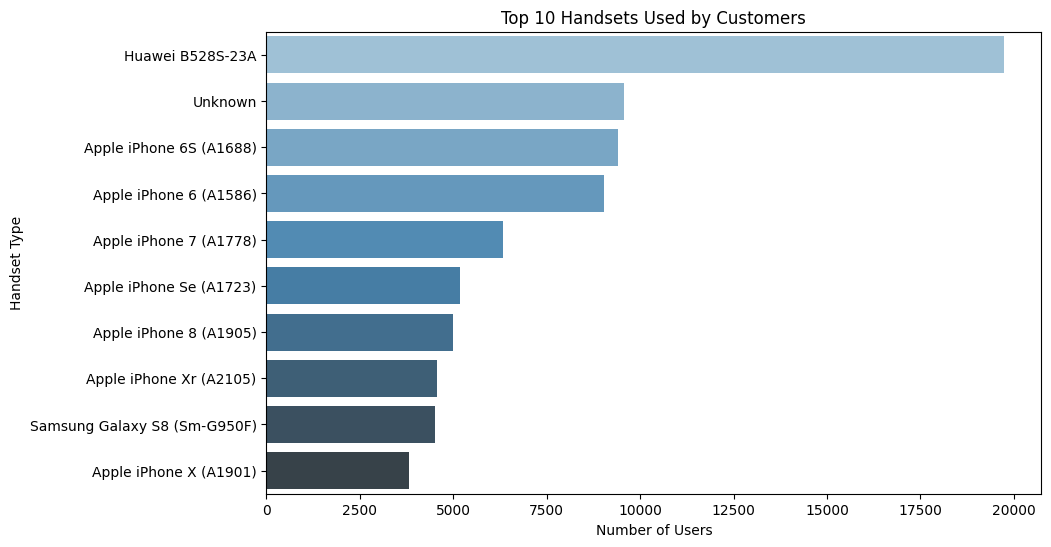

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot top 10 handsets
plt.figure(figsize=(10,6))
sns.barplot(x=top_10_handsets.values, y=top_10_handsets.index, palette="Blues_d")
plt.title('Top 10 Handsets Used by Customers')
plt.xlabel('Number of Users')
plt.ylabel('Handset Type')
plt.show()


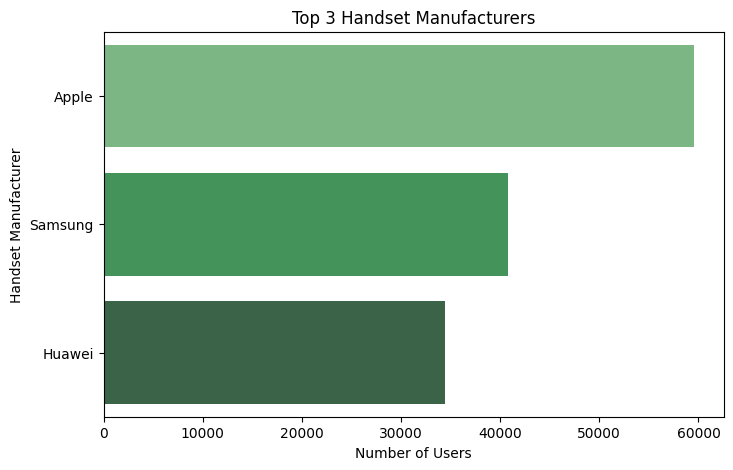

In [33]:
# Plot top 3 manufacturers
plt.figure(figsize=(8,5))
sns.barplot(x=top_3_manufacturers.values, y=top_3_manufacturers.index, palette="Greens_d")
plt.title('Top 3 Handset Manufacturers')
plt.xlabel('Number of Users')
plt.ylabel('Handset Manufacturer')
plt.show()



Application Data Usage (Bytes):
Social Media DL (Bytes)    2.693001e+11
Google DL (Bytes)          8.626186e+11
Youtube DL (Bytes)         1.745123e+12
Netflix DL (Bytes)         1.744039e+12
Gaming DL (Bytes)          6.330713e+13
Other DL (Bytes)           6.316550e+13
dtype: float64


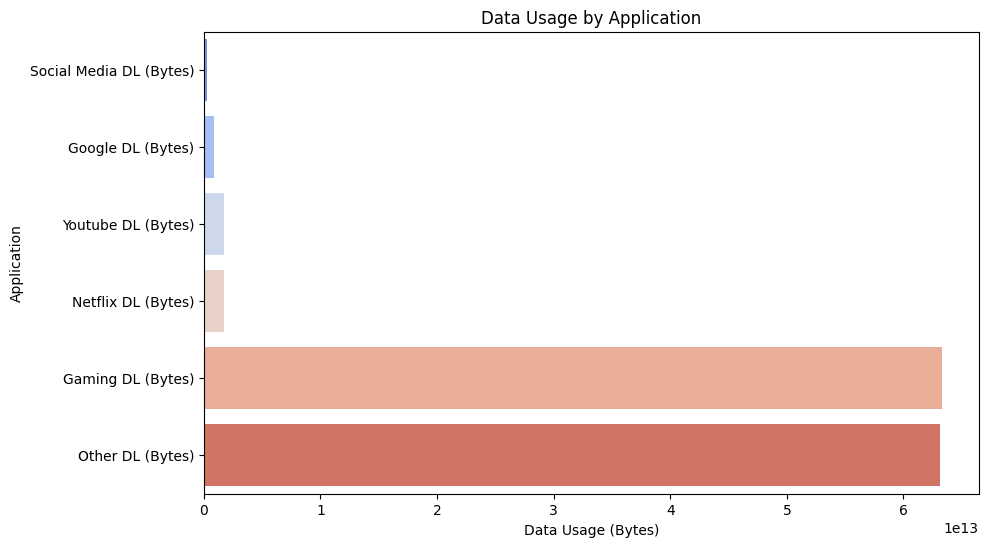

In [34]:
# Analyze user behavior through data usage in different categories (e.g., Social Media, YouTube, Netflix)
application_columns = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']

# Sum the usage for each category
application_usage = cleaned_data[application_columns].sum()

# Display application usage
print("\nApplication Data Usage (Bytes):")
print(application_usage)

# Plot application data usage
plt.figure(figsize=(10,6))
sns.barplot(x=application_usage.values, y=application_usage.index, palette="coolwarm")
plt.title('Data Usage by Application')
plt.xlabel('Data Usage (Bytes)')
plt.ylabel('Application')
plt.show()


In [35]:
# Import the function from tellco_telecom_anlysis.py
from tellco_telecom_anlysis import aggregate_user_behavior

# Call the function to aggregate user behavior
user_behavior_data = aggregate_user_behavior(cleaned_data)

# Display the aggregated data for user behavior
print("Aggregated User Behavior Data:")
print(user_behavior_data.head())




Aggregated User Behavior Data:
   MSISDN/Number  number_of_xdr_sessions  total_session_duration  \
0   3.360100e+10                       1                116720.0   
1   3.360100e+10                       1                181230.0   
2   3.360100e+10                       1                134969.0   
3   3.360101e+10                       1                 49878.0   
4   3.360101e+10                       2                 37104.0   

   total_download_data  total_upload_data  social_media_dl   google_dl  \
0         8.426375e+08         36053108.0        2206504.0   3337123.0   
1         1.207552e+08         36104459.0        2598548.0   4197697.0   
2         5.566597e+08         39306820.0        3148004.0   3343483.0   
3         4.019932e+08         20327526.0         251469.0   5937765.0   
4         1.363130e+09         94280527.0        2861230.0  13728668.0   

    email_dl  youtube_dl  netflix_dl     gaming_dl     other_dl  \
0   837400.0  14900201.0  10265105.0  8.110911e+

In [36]:
# Check the data types of each variable
data_types = cleaned_data.dtypes

# Display data types
print("Data Types of Variables:")
print(data_types)


Data Types of Variables:
Bearer Id                                          float64
Start                                       datetime64[ns]
Start ms                                           float64
End                                         datetime64[ns]
End ms                                             float64
Dur. (ms)                                          float64
IMSI                                               float64
MSISDN/Number                                      float64
IMEI                                               float64
Last Location Name                                  object
Avg RTT DL (ms)                                    float64
Avg RTT UL (ms)                                    float64
Avg Bearer TP DL (kbps)                            float64
Avg Bearer TP UL (kbps)                            float64
TCP DL Retrans. Vol (Bytes)                        float64
TCP UL Retrans. Vol (Bytes)                        float64
DL TP < 50 Kbps (%)            

In [37]:
import pandas as pd

# Compute total session duration for each user
cleaned_data['Total_Duration'] = cleaned_data.groupby('MSISDN/Number')['Dur. (ms)'].transform('sum')

# Segment users into 5 deciles based on total duration
cleaned_data['Decile_Class'] = pd.qcut(cleaned_data['Total_Duration'], 5, labels=False)

# Compute total data (DL + UL) per decile class
cleaned_data['Total_Data'] = cleaned_data['Total DL (Bytes)'] + cleaned_data['Total UL (Bytes)']
decile_data = cleaned_data.groupby('Decile_Class')['Total_Data'].sum().reset_index()

# Display the results
print("Total Data per Decile Class:")
print(decile_data)


Total Data per Decile Class:
   Decile_Class    Total_Data
0             0  1.487214e+13
1             1  1.490446e+13
2             2  1.602358e+13
3             3  1.375280e+13
4             4  1.481217e+13


In [38]:
# Describe the basic statistics for the entire dataset
basic_stats = cleaned_data.describe()

# Display the basic statistics
print("Basic Statistics:")
print(basic_stats)


Basic Statistics:
          Bearer Id                          Start       Start ms  \
count  1.500010e+05                         150001  150001.000000   
mean   1.012045e+19  2019-04-26 09:43:14.471503872     499.188199   
min    6.917538e+18            1970-01-01 00:00:00       0.000000   
25%    7.349883e+18            2019-04-25 00:26:00     250.000000   
50%    7.349883e+18            2019-04-26 08:51:00     499.000000   
75%    1.304243e+19            2019-04-27 18:18:00     749.000000   
max    1.318654e+19            2019-04-29 07:28:00     999.000000   
std    2.892438e+18                            NaN     288.610872   

                                 End         End ms      Dur. (ms)  \
count                         150001  150001.000000  150001.000000   
mean   2019-04-27 14:46:42.860514560     498.800888   98437.654982   
min              1970-01-01 00:00:00       0.000000    7142.000000   
25%              2019-04-26 07:30:00     251.000000   57442.000000   
50%       

In [39]:
import numpy as np

# Filter only numeric columns to avoid datetime or object columns
numeric_columns = cleaned_data.select_dtypes(include=[np.number])

# Compute dispersion parameters (variance) for each numeric column
dispersion_params = numeric_columns.var()

# Display dispersion parameters (variance)
print("Dispersion Parameters (Variance) for Numeric Columns:")
print(dispersion_params)


Dispersion Parameters (Variance) for Numeric Columns:
Bearer Id                                   8.366197e+36
Start ms                                    8.329624e+04
End ms                                      8.299970e+04
Dur. (ms)                                   3.607122e+09
IMSI                                        1.786280e+18
MSISDN/Number                               6.671331e+19
IMEI                                        5.011953e+26
Avg RTT DL (ms)                             1.506838e+04
Avg RTT UL (ms)                             3.806317e+02
Avg Bearer TP DL (kbps)                     3.577746e+08
Avg Bearer TP UL (kbps)                     6.045790e+06
TCP DL Retrans. Vol (Bytes)                 2.584652e+14
TCP UL Retrans. Vol (Bytes)                 9.744165e+11
DL TP < 50 Kbps (%)                         1.076329e+02
50 Kbps < DL TP < 250 Kbps (%)              1.967160e+01
250 Kbps < DL TP < 1 Mbps (%)               7.216594e+00
DL TP > 1 Mbps (%)                

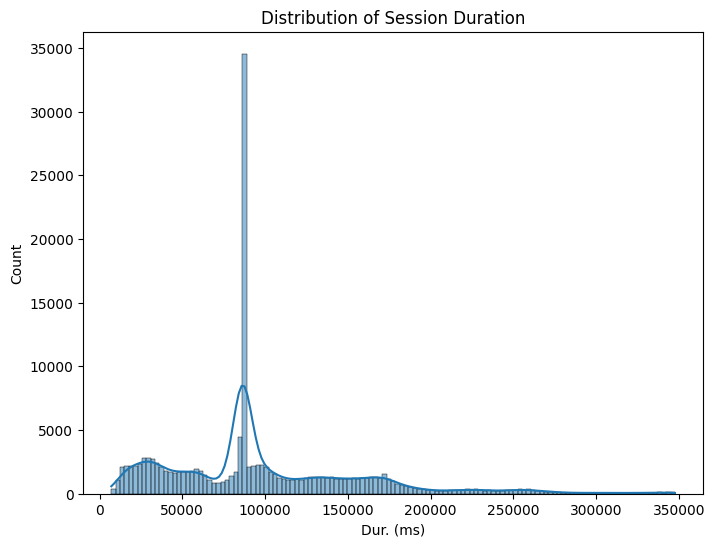

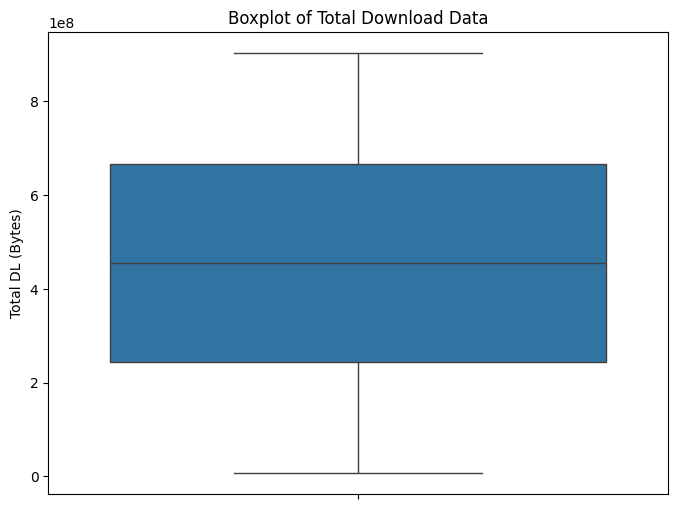

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for session duration
plt.figure(figsize=(8, 6))
sns.histplot(cleaned_data['Dur. (ms)'], kde=True)
plt.title('Distribution of Session Duration')
plt.show()

# Boxplot for total download data
plt.figure(figsize=(8, 6))
sns.boxplot(cleaned_data['Total DL (Bytes)'])
plt.title('Boxplot of Total Download Data')
plt.show()


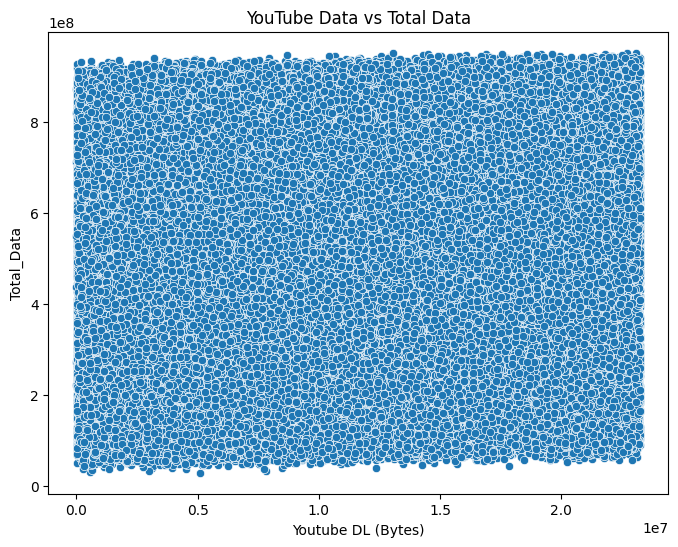

In [41]:
# Calculate total data for each user
cleaned_data['Total_Data'] = cleaned_data['Total DL (Bytes)'] + cleaned_data['Total UL (Bytes)']

# Scatter plot of YouTube data vs total data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=cleaned_data['Youtube DL (Bytes)'], y=cleaned_data['Total_Data'])
plt.title('YouTube Data vs Total Data')
plt.show()


Correlation Matrix:
                         Social Media DL (Bytes)  Google DL (Bytes)  \
Social Media DL (Bytes)                 1.000000          -0.001954   
Google DL (Bytes)                      -0.001954           1.000000   
Youtube DL (Bytes)                     -0.001389           0.001760   
Netflix DL (Bytes)                     -0.001817           0.000548   
Gaming DL (Bytes)                       0.001018          -0.001421   
Other DL (Bytes)                        0.006126          -0.002557   

                         Youtube DL (Bytes)  Netflix DL (Bytes)  \
Social Media DL (Bytes)           -0.001389           -0.001817   
Google DL (Bytes)                  0.001760            0.000548   
Youtube DL (Bytes)                 1.000000            0.001202   
Netflix DL (Bytes)                 0.001202            1.000000   
Gaming DL (Bytes)                 -0.001861           -0.003201   
Other DL (Bytes)                   0.002042           -0.006000   

            

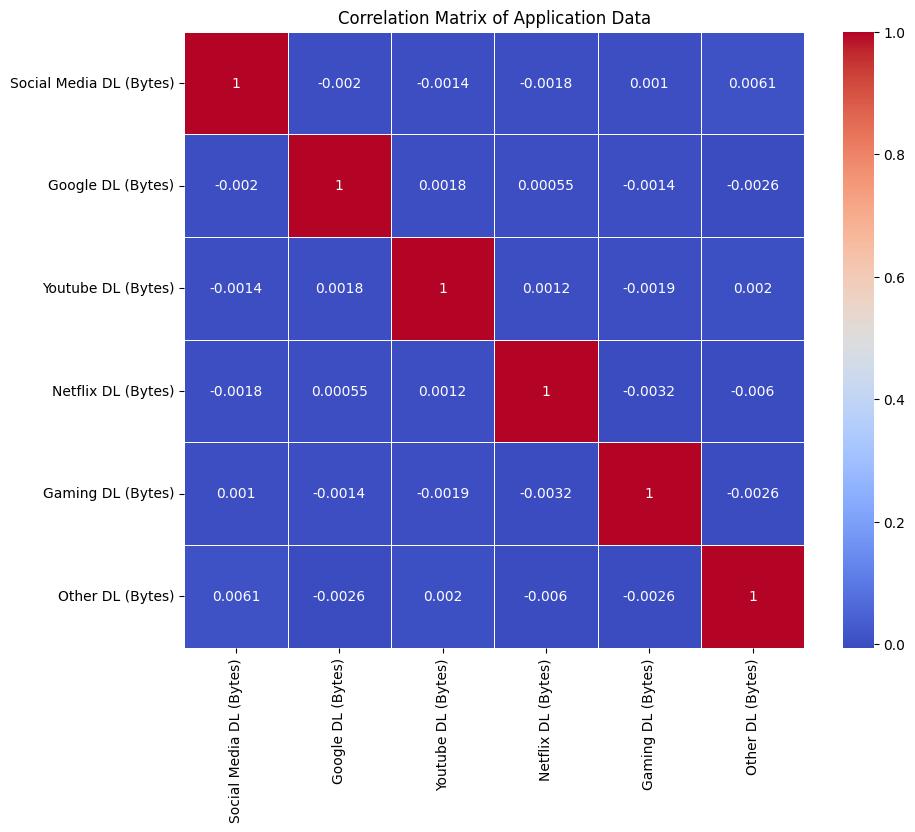

In [43]:
# Correlation matrix for application data
app_data_columns = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']
correlation_matrix = cleaned_data[app_data_columns].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Application Data')
plt.show()


Explained Variance by Component: [0.16842272 0.1673859 ]


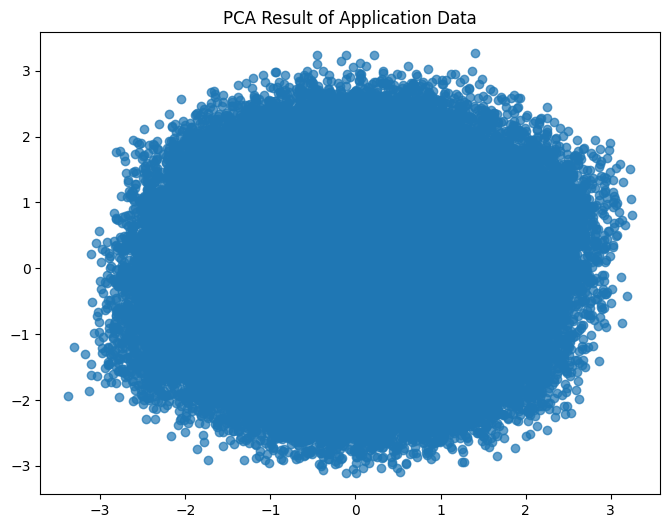

In [44]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the application data
scaler = StandardScaler()
app_data_scaled = scaler.fit_transform(cleaned_data[app_data_columns])

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(app_data_scaled)

# Display explained variance ratio
print("Explained Variance by Component:", pca.explained_variance_ratio_)

# Plot the PCA result
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7)
plt.title('PCA Result of Application Data')
plt.show()


# Task 2

In [45]:
import sys
import os

# Add the scripts directory to the Python path
sys.path.append(os.path.abspath('../scripts'))
from tellco_telecom_anlysis import calculate_application_traffic, calculate_engagement_over_time, calculate_user_engagement

# Call the function to calculate user engagement metrics
user_engagement_metrics = calculate_user_engagement(cleaned_data)

# Display the first few rows of the engagement metrics
print("User Engagement Metrics:")
print(user_engagement_metrics.head())

# Call the function to calculate application traffic and contribution
application_traffic_metrics = calculate_application_traffic(cleaned_data)

# Display the first few rows of the application traffic metrics
print("Application Traffic Metrics:")
print(application_traffic_metrics.head())

# Optional: Save the application traffic metrics to a file

# Call the function to calculate engagement over time
engagement_over_time_metrics = calculate_engagement_over_time(cleaned_data)

# Display the first few rows of the engagement over time metrics
print("Engagement Over Time Metrics:")
print(engagement_over_time_metrics.head())



User Engagement Metrics:
   MSISDN/Number  session_frequency  total_session_duration  \
0   3.360100e+10                  1                116720.0   
1   3.360100e+10                  1                181230.0   
2   3.360100e+10                  1                134969.0   
3   3.360101e+10                  1                 49878.0   
4   3.360101e+10                  2                 37104.0   

   total_download_data  total_upload_data  total_traffic  
0         8.426375e+08         36053108.0   8.786906e+08  
1         1.207552e+08         36104459.0   1.568596e+08  
2         5.566597e+08         39306820.0   5.959665e+08  
3         4.019932e+08         20327526.0   4.223207e+08  
4         1.363130e+09         94280527.0   1.457411e+09  
Application Traffic Metrics:
   MSISDN/Number  total_traffic  social_media_traffic  google_traffic  \
0   3.360100e+10   8.786906e+08             2232135.0       4389005.0   
1   3.360100e+10   1.568596e+08             2660565.0       5334863

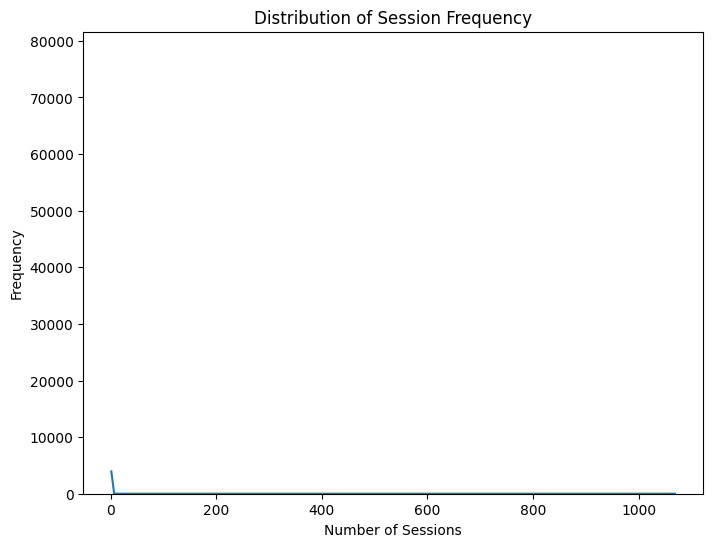

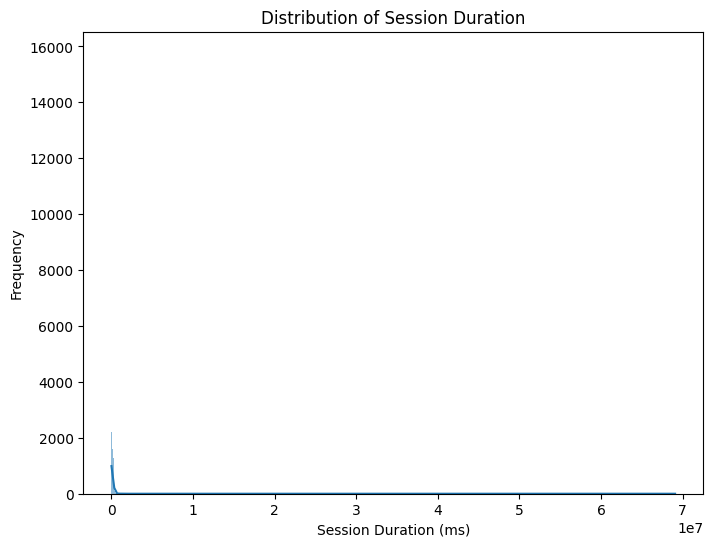

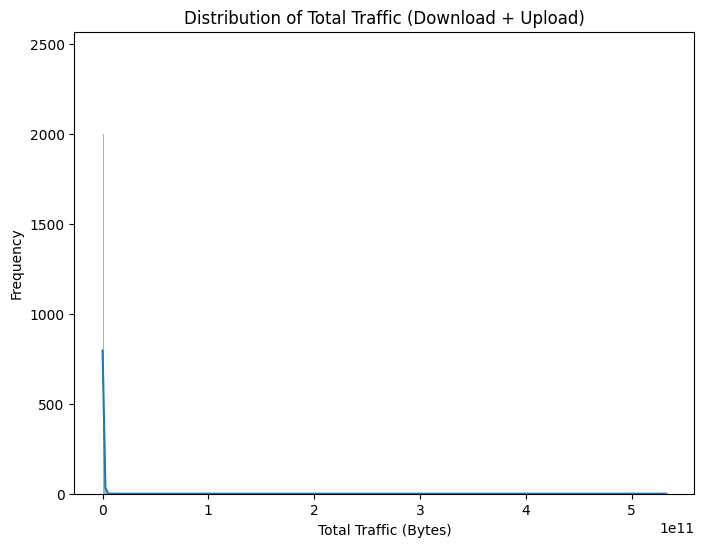

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for session frequency
plt.figure(figsize=(8, 6))
sns.histplot(user_engagement_metrics['session_frequency'], kde=True)
plt.title('Distribution of Session Frequency')
plt.xlabel('Number of Sessions')
plt.ylabel('Frequency')
plt.show()

# Histogram for total session duration
plt.figure(figsize=(8, 6))
sns.histplot(user_engagement_metrics['total_session_duration'], kde=True)
plt.title('Distribution of Session Duration')
plt.xlabel('Session Duration (ms)')
plt.ylabel('Frequency')
plt.show()

# Histogram for total traffic (DL + UL)
plt.figure(figsize=(8, 6))
sns.histplot(user_engagement_metrics['total_traffic'], kde=True)
plt.title('Distribution of Total Traffic (Download + Upload)')
plt.xlabel('Total Traffic (Bytes)')
plt.ylabel('Frequency')
plt.show()


In [47]:
# Call the function to aggregate metrics per customer
from tellco_telecom_anlysis import aggregate_metrics_per_customer


customer_metrics = aggregate_metrics_per_customer(cleaned_data)

# Get the top 10 customers per engagement metric
top_10_session_frequency = customer_metrics.nlargest(10, 'session_frequency')
top_10_session_duration = customer_metrics.nlargest(10, 'total_session_duration')
top_10_total_traffic = customer_metrics.nlargest(10, 'total_traffic')

# Display top 10 customers per engagement metric
print("Top 10 Customers by Session Frequency:")
print(top_10_session_frequency)

print("\nTop 10 Customers by Session Duration:")
print(top_10_session_duration)

print("\nTop 10 Customers by Total Traffic:")
print(top_10_total_traffic)


Top 10 Customers by Session Frequency:
       MSISDN/Number  session_frequency  total_session_duration  \
53644   3.366371e+10               1069              69072934.0   
13526   3.362632e+10                 18               2379668.0   
6437    3.361489e+10                 17               2038615.0   
13180   3.362578e+10                 17               1815770.0   
37052   3.365973e+10                 16               3625655.0   
76363   3.367588e+10                 15               2961677.0   
92923   3.376054e+10                 15               2064814.0   
65118   3.366716e+10                 13               1642454.0   
666     3.360313e+10                 12               1605578.0   
1279    3.360452e+10                 12               1535045.0   

       total_download  total_upload  total_traffic  
53644    4.881636e+11  4.453537e+10   5.326990e+11  
13526    7.301517e+09  6.696507e+08   7.971167e+09  
6437     8.156743e+09  6.894830e+08   8.846226e+09  
13180    7.

In [48]:
# Normalize and run k-means clustering
from tellco_telecom_anlysis import normalize_and_cluster


customer_metrics_clustered, kmeans_model = normalize_and_cluster(customer_metrics)

# Display the first few rows with cluster labels
print("Customer Metrics with Cluster Labels:")
print(customer_metrics_clustered.head())

Customer Metrics with Cluster Labels:
   MSISDN/Number  session_frequency  total_session_duration  total_download  \
0   3.360100e+10                  1                116720.0    8.426375e+08   
1   3.360100e+10                  1                181230.0    1.207552e+08   
2   3.360100e+10                  1                134969.0    5.566597e+08   
3   3.360101e+10                  1                 49878.0    4.019932e+08   
4   3.360101e+10                  2                 37104.0    1.363130e+09   

   total_upload  total_traffic  cluster  
0    36053108.0   8.786906e+08        0  
1    36104459.0   1.568596e+08        0  
2    39306820.0   5.959665e+08        0  
3    20327526.0   4.223207e+08        0  
4    94280527.0   1.457411e+09        0  


In [49]:
# Compute statistics per cluster
from tellco_telecom_anlysis import cluster_statistics


cluster_stats = cluster_statistics(customer_metrics_clustered)

# Display the cluster statistics
print("Cluster Statistics:")
print(cluster_stats)

Cluster Statistics:
   cluster  min_session_frequency  max_session_frequency  \
0        0                      1                      4   
1        1                   1069                   1069   
2        2                      1                     18   

   avg_session_frequency  total_session_frequency  min_session_duration  \
0               1.186536                   111583                7142.0   
1            1069.000000                     1069            69072934.0   
2               2.915158                    37349               89973.0   

   max_session_duration  avg_session_duration  total_session_duration  \
0              318382.0          1.048126e+05            9.856677e+09   
1            69072934.0          6.907293e+07            6.907293e+07   
2             3625655.0          3.777706e+05            4.839997e+09   

   min_total_traffic  max_total_traffic  avg_total_traffic  \
0       3.324901e+07       2.762548e+09       5.842788e+08   
1       5.326990e+11 

In [50]:
# Aggregate traffic per application
from tellco_telecom_anlysis import aggregate_application_traffic


application_traffic = aggregate_application_traffic(cleaned_data)

# Get the top 10 most engaged users for each application
top_10_social_media = application_traffic.nlargest(10, 'total_social_media')
top_10_google = application_traffic.nlargest(10, 'total_google')
top_10_youtube = application_traffic.nlargest(10, 'total_youtube')

# Display the top 10 users per application
print("Top 10 Users by Social Media Traffic:")
print(top_10_social_media)

print("\nTop 10 Users by Google Traffic:")
print(top_10_google)

print("\nTop 10 Users by YouTube Traffic:")
print(top_10_youtube)


Top 10 Users by Social Media Traffic:
        MSISDN/Number  total_social_media  total_google  total_youtube  \
53644    3.366371e+10        1.976267e+09  8.269751e+09   2.442840e+10   
13526    3.362632e+10        4.337478e+07  1.521919e+08   3.744830e+08   
92923    3.376054e+10        3.978319e+07  1.232231e+08   3.962892e+08   
37052    3.365973e+10        3.541236e+07  1.165163e+08   2.579911e+08   
6437     3.361489e+10        2.829454e+07  1.279738e+08   3.943702e+08   
13180    3.362578e+10        2.713550e+07  1.423079e+08   4.529588e+08   
65118    3.366716e+10        2.424785e+07  1.050327e+08   3.152313e+08   
106137   3.378632e+10        2.397492e+07  1.102545e+08   2.147639e+08   
70960    3.366907e+10        2.380083e+07  7.782468e+07   2.364028e+08   
666      3.360313e+10        2.307782e+07  8.692902e+07   2.840901e+08   

        total_netflix  total_gaming  
53644    2.434186e+10  4.621878e+11  
13526    3.287257e+08  6.887572e+09  
92923    3.346433e+08  7.461045e+

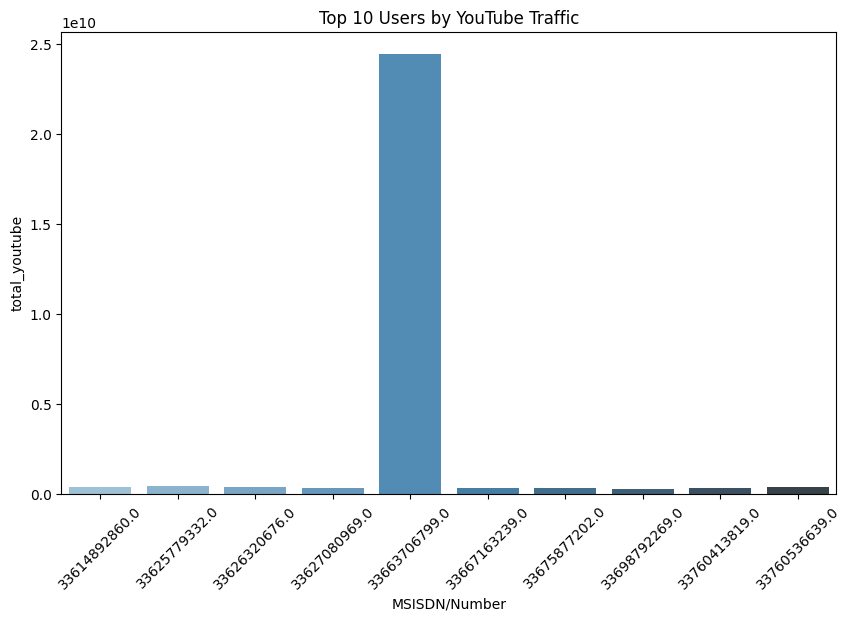

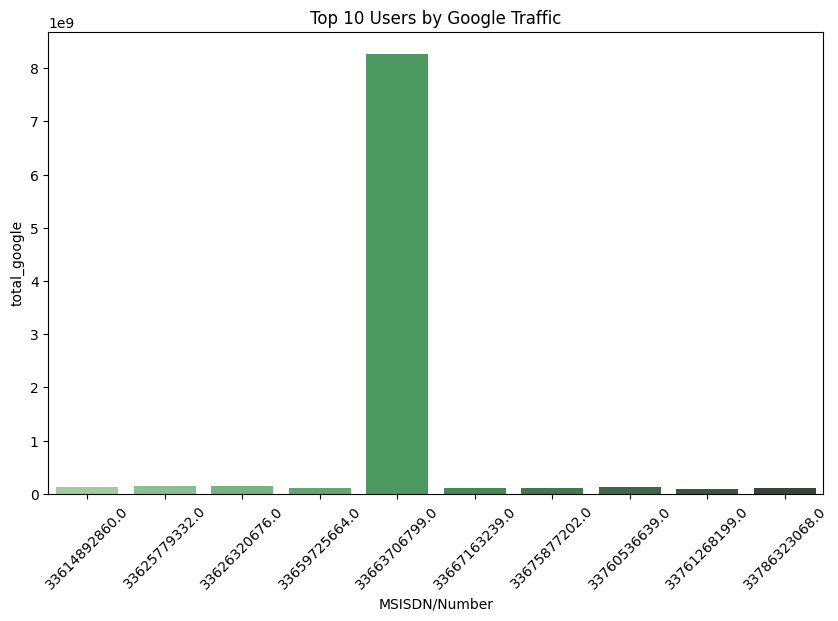

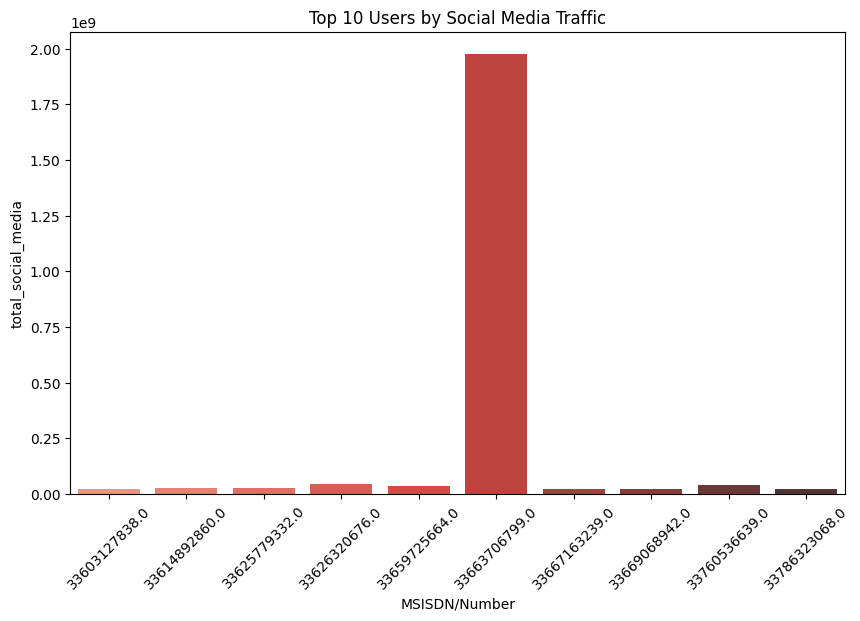

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot top 3 applications
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_youtube['MSISDN/Number'], y=top_10_youtube['total_youtube'], palette='Blues_d')
plt.title('Top 10 Users by YouTube Traffic')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_google['MSISDN/Number'], y=top_10_google['total_google'], palette='Greens_d')
plt.title('Top 10 Users by Google Traffic')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_social_media['MSISDN/Number'], y=top_10_social_media['total_social_media'], palette='Reds_d')
plt.title('Top 10 Users by Social Media Traffic')
plt.xticks(rotation=45)
plt.show()


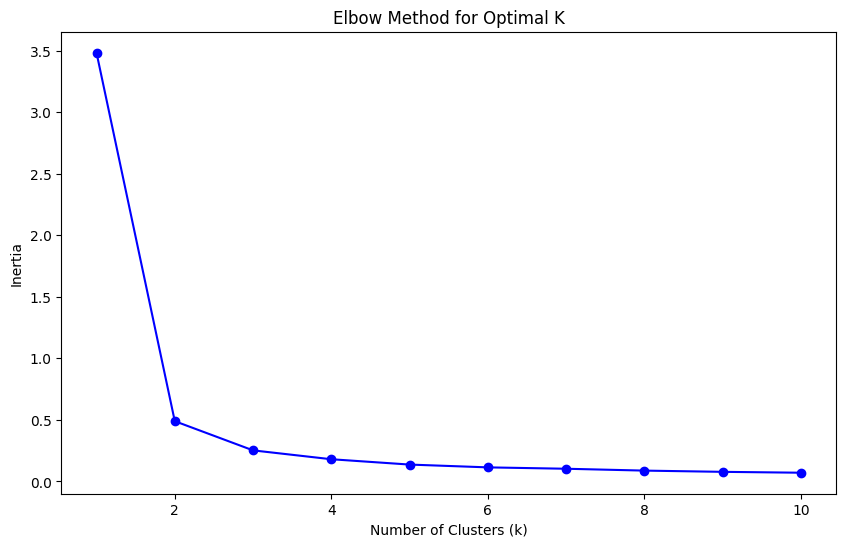

In [27]:
from tellco_telecom_anlysis import elbow_method


elbow_method(customer_metrics)